In [1]:
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, '../qtrader/qtrader')
dir_path = os.getcwd()
print(dir_path)
from stock import Stock
import calc

import numpy as np
import pandas as pd

/home/jovyan/alu/ipython


In [2]:
nofi = Stock('../data/nofi_1.csv', encoding='iso8859_15')
data = nofi.get_data()
data.tail()

,quote_date,paper,exch,open,high,low,close,volume,value,changeRatio,amplitude
date,,,,,,,,,,,
2018-02-26,20180226,NOFI,Oslo Børs,83.8,86.75,83.70,85.7,295321,25313646,2.389486,3.643967
2018-02-27,20180227,NOFI,Oslo Børs,86.1,86.25,84.25,86.0,465692,39733624,0.350058,2.333722
2018-02-28,20180228,NOFI,Oslo Børs,88.1,92.00,87.95,92.0,1911226,172150911,6.976744,4.709302
2018-03-01,20180301,NOFI,Oslo Børs,92.2,92.60,90.65,92.4,783643,72110118,0.434783,2.119565
2018-03-02,20180302,NOFI,Oslo Børs,91.0,92.35,90.00,90.1,429998,38924178,-2.489177,2.543290


# 7. 量化交易

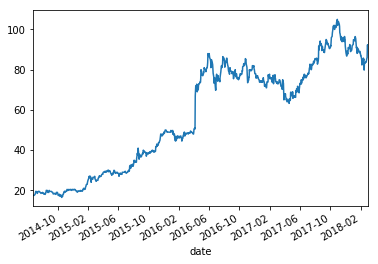

In [3]:
data['close'].plot()

In [4]:
bors = data.loc['2016-07-01':]

k, b = calc.linear_regression_kb(bors['close'].values);
degree = np.rad2deg(k)

model, zoom_factor = calc.linear_regression_y(bors['close'].values, zoom=True)
k2 = model.params[1]
b2 = model.params[0]
degree2 = np.rad2deg(k2)

x = np.arange(0, bors['close'].shape[0])
reg_y_fit = x * k + b
reg_y_fit2 = x * k2 + b2

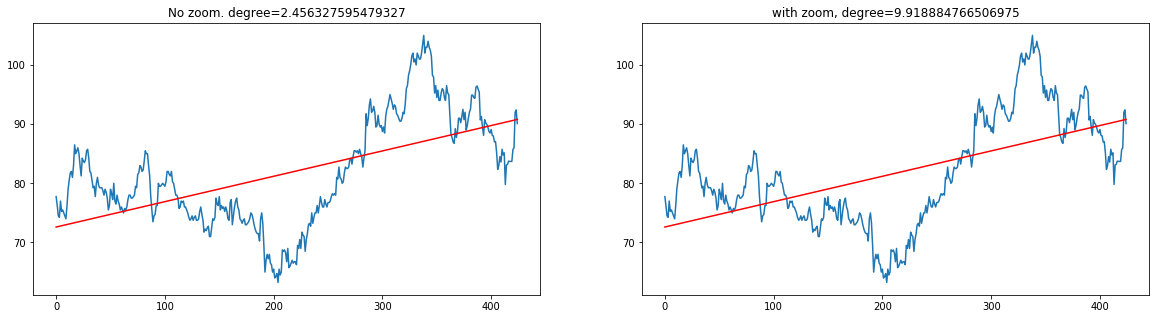

In [5]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].set_title(f"No zoom. degree={degree}")
axes[0].plot(x, bors['close'].values, '')
axes[0].plot(x, reg_y_fit, 'r')


axes[1].set_title(f"with zoom, degree={degree2}")
axes[1].plot(x, bors['close'].values, '')
axes[1].plot(x, reg_y_fit2/zoom_factor, 'r')

## 7.1 均值回复策略
- train dataset是过去第二年的数据。
- test dataset是过去一年的数据。

In [6]:
Y1=-252

train = data.iloc[Y1*2:Y1];train.head()
train.shape

(252, 11)

In [7]:
test = data.iloc[Y1:];test.head()
test.shape

(252, 11)

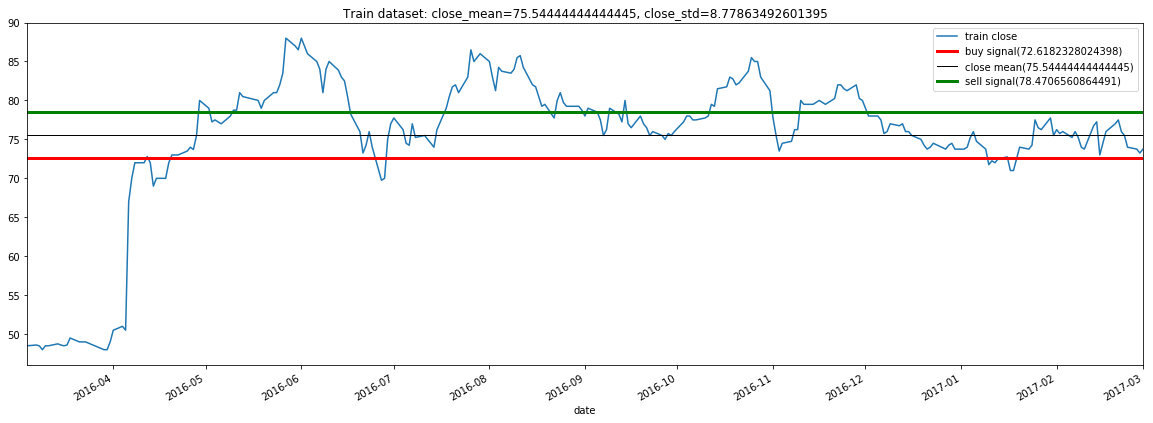

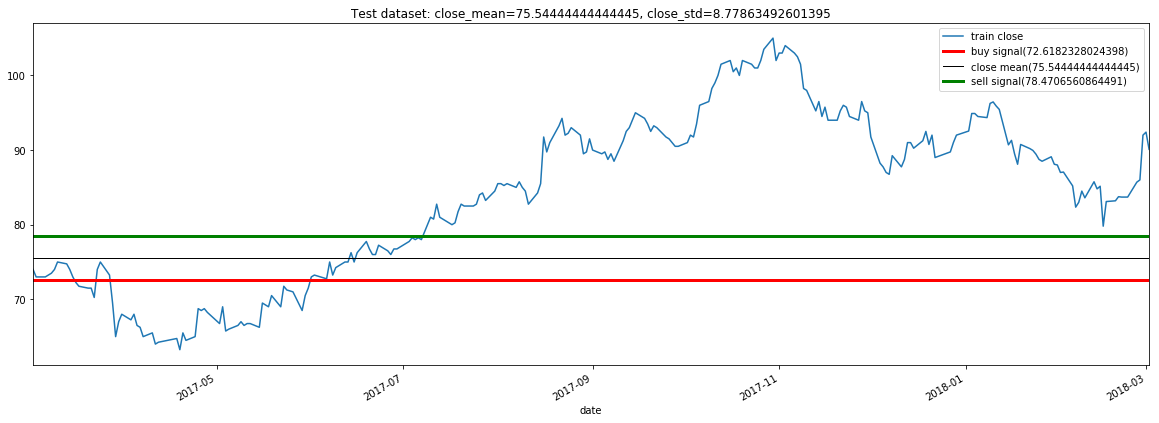

In [8]:
close_mean = train.close.mean()
close_std = train.close.std()

sell_signal = close_mean + close_std / 3
buy_signal = close_mean - close_std /3

plt.figure(figsize=(20,7))
plt.title(f"Train dataset: close_mean={close_mean}, close_std={close_std}")
train.close.plot()
plt.axhline(buy_signal, color='r', lw=3)
plt.axhline(close_mean, color='black', lw=1)
plt.axhline(sell_signal, color='g', lw=3)
plt.legend(['train close', f'buy signal({buy_signal})', f'close mean({close_mean})', f'sell signal({sell_signal})'], 
           loc='best')
plt.figure(figsize=(20,7))
plt.title(f"Test dataset: close_mean={close_mean}, close_std={close_std}")
test.close.plot()
plt.axhline(buy_signal, color='r', lw=3)
plt.axhline(close_mean, color='black', lw=1)
plt.axhline(sell_signal, color='g', lw=3)
plt.legend(['train close', f'buy signal({buy_signal})', f'close mean({close_mean})', f'sell signal({sell_signal})'], 
           loc='best')

In [9]:
test.loc[test['close'] <= buy_signal, 'signal'] = 1
test.loc[test['close'] >= sell_signal,'signal'] = 0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
test['keep'] = test['signal']
test['keep'].fillna(method='ffill', inplace=True)
#test.loc['2017-03-01':'2017-05-01']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


> benchmark_profit2 is to indicate benchmark_profit is correct.
> we can use ***np.log(close / close.shift(1))*** to calculate profit

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb607a9908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ffb60401160>], dtype=object)

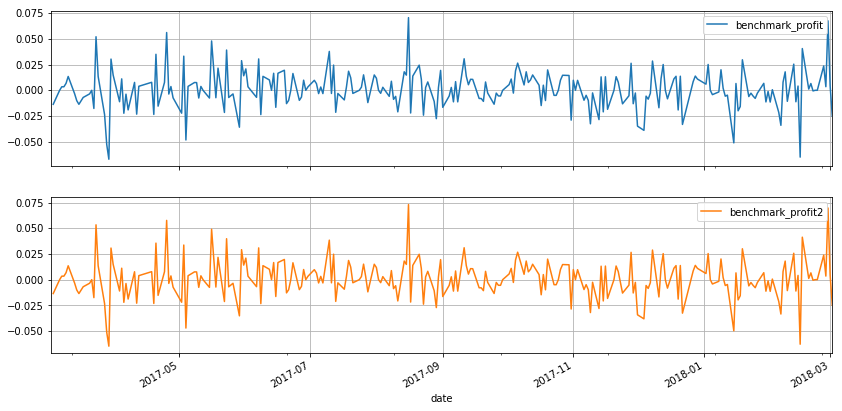

In [11]:
test['benchmark_profit'] = np.log(test['close'] / test['close'].shift(1))
test['benchmark_profit2'] = (test['close'] - test['close'].shift(1)) /test['close'].shift(1)
test[['benchmark_profit','benchmark_profit2']].plot(subplots=True, grid=True, figsize=(14,7))

In [12]:
test.head()

,quote_date,paper,exch,open,high,low,close,volume,value,changeRatio,amplitude,signal,keep,benchmark_profit,benchmark_profit2
date,,,,,,,,,,,,,,,
2017-03-02,20170302,NOFI,Oslo Børs,73.75,74.00,73.50,74.00,191332,14125327,0.338983,0.677966,NaN,NaN,NaN,NaN
2017-03-03,20170303,NOFI,Oslo Børs,73.75,73.75,71.75,73.00,221556,16070889,-1.351351,2.702703,NaN,NaN,-0.013606,-0.013514
2017-03-06,20170306,NOFI,Oslo Børs,73.25,73.75,72.50,73.00,132675,9679677,0.000000,1.712329,NaN,NaN,0.000000,0.000000
2017-03-07,20170307,NOFI,Oslo Børs,73.25,74.00,73.00,73.25,189629,13970687,0.342466,1.369863,NaN,NaN,0.003419,0.003425
2017-03-08,20170308,NOFI,Oslo Børs,73.00,73.75,72.50,73.50,133699,9765922,0.341297,1.706485,NaN,NaN,0.003407,0.003413


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


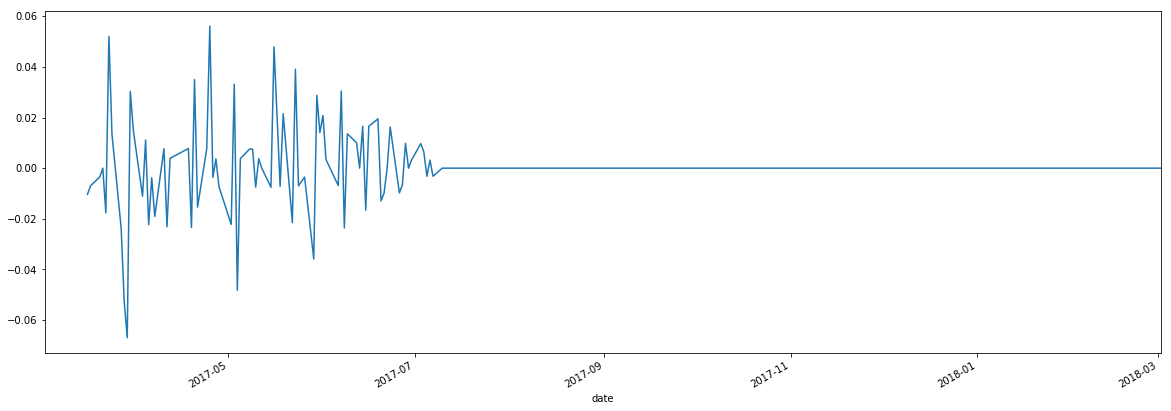

In [13]:
test['trend_profit'] = test['keep'] * test['benchmark_profit']
test['trend_profit'].plot(figsize=(20, 7))

In [14]:
#test.loc['2017-03-01':'2017-05-01']

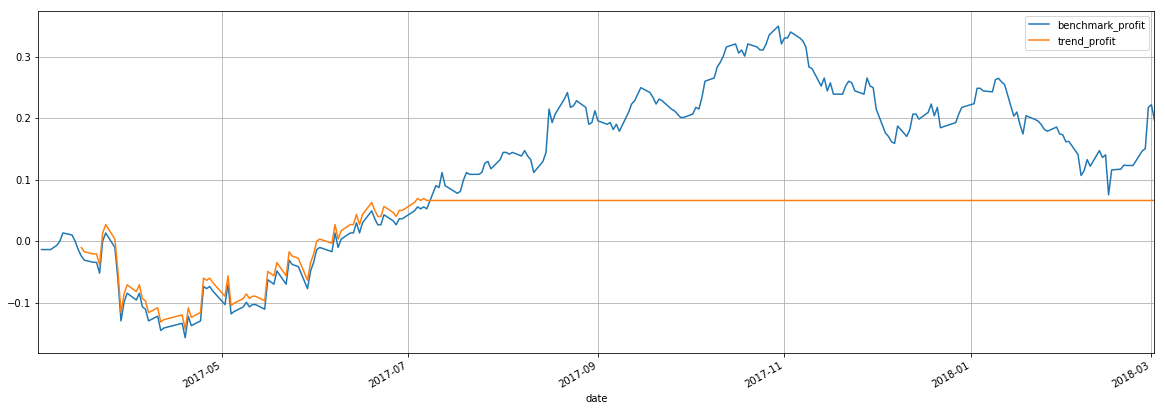

In [15]:
test[['benchmark_profit', 'trend_profit']].cumsum().plot(grid=True, figsize=(20, 7))

> ***np.exp***显示了更好的投资回报率（1.2），而不是增长率

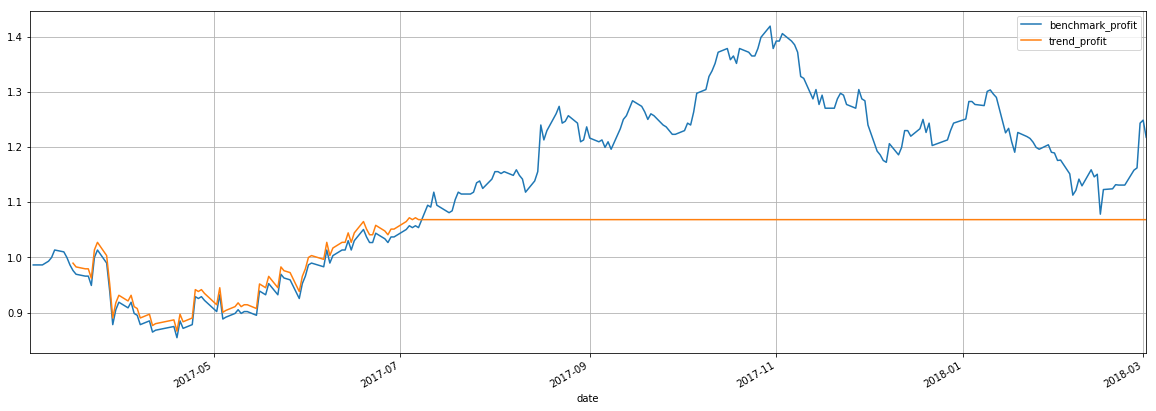

In [16]:
test[['benchmark_profit', 'trend_profit']].cumsum().apply(np.exp).plot(grid=True, figsize=(20, 7))

## 2. 趋势跟踪策略
N1: N1天内的最高价格，为买入信号
N2: N2天内的最低加个，为卖出信号
N1>N2

In [27]:
N1=42
N2=21

test = data.loc['2016-06-1':]; test.head()

,quote_date,paper,exch,open,high,low,close,volume,value,changeRatio,amplitude
date,,,,,,,,,,,
2016-06-01,20160601,NOFI,Oslo Børs,87.0,88.0,86.5,88.0,128636,11215751,1.734104,1.734104
2016-06-02,20160602,NOFI,Oslo Børs,88.0,88.0,85.0,87.0,21443,1863910,-1.136364,3.409091
2016-06-03,20160603,NOFI,Oslo Børs,87.0,87.0,85.5,86.0,20815,1792472,-1.149425,1.724138
2016-06-06,20160606,NOFI,Oslo Børs,87.0,87.0,85.0,85.0,25126,2156055,-1.162791,2.325581
2016-06-07,20160607,NOFI,Oslo Børs,85.0,86.0,84.0,84.0,55172,4650109,-1.176471,2.352941


In [28]:
test['n1_high'] = test['high'].rolling(N1).max()
test['n2_low'] = test['low'].rolling(N2).min()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
expan_max = test['close'].expanding().max()
expan_min = test['low'].expanding().min()

In [30]:
test['n1_high'].fillna(value=expan_max, inplace=True)
test['n2_low'].fillna(value=expan_min, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
test.head()

,quote_date,paper,exch,open,high,low,close,volume,value,changeRatio,amplitude,n1_high,n2_low
date,,,,,,,,,,,,,
2016-06-01,20160601,NOFI,Oslo Børs,87.0,88.0,86.5,88.0,128636,11215751,1.734104,1.734104,88.0,86.5
2016-06-02,20160602,NOFI,Oslo Børs,88.0,88.0,85.0,87.0,21443,1863910,-1.136364,3.409091,88.0,85.0
2016-06-03,20160603,NOFI,Oslo Børs,87.0,87.0,85.5,86.0,20815,1792472,-1.149425,1.724138,88.0,85.0
2016-06-06,20160606,NOFI,Oslo Børs,87.0,87.0,85.0,85.0,25126,2156055,-1.162791,2.325581,88.0,85.0
2016-06-07,20160607,NOFI,Oslo Børs,85.0,86.0,84.0,84.0,55172,4650109,-1.176471,2.352941,88.0,84.0


In [32]:
test.loc[test['close']>test['n1_high'].shift(1), 'signal'] = 1
test.loc[test['close']<test['n2_low'].shift(1), 'signal'] = 0
test.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,quote_date,paper,exch,open,high,low,close,volume,value,changeRatio,amplitude,n1_high,n2_low,signal
date,,,,,,,,,,,,,,
2016-06-01,20160601,NOFI,Oslo Børs,87.0,88.0,86.5,88.0,128636,11215751,1.734104,1.734104,88.0,86.5,NaN
2016-06-02,20160602,NOFI,Oslo Børs,88.0,88.0,85.0,87.0,21443,1863910,-1.136364,3.409091,88.0,85.0,NaN
2016-06-03,20160603,NOFI,Oslo Børs,87.0,87.0,85.5,86.0,20815,1792472,-1.149425,1.724138,88.0,85.0,NaN
2016-06-06,20160606,NOFI,Oslo Børs,87.0,87.0,85.0,85.0,25126,2156055,-1.162791,2.325581,88.0,85.0,NaN
2016-06-07,20160607,NOFI,Oslo Børs,85.0,86.0,84.0,84.0,55172,4650109,-1.176471,2.352941,88.0,84.0,0.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

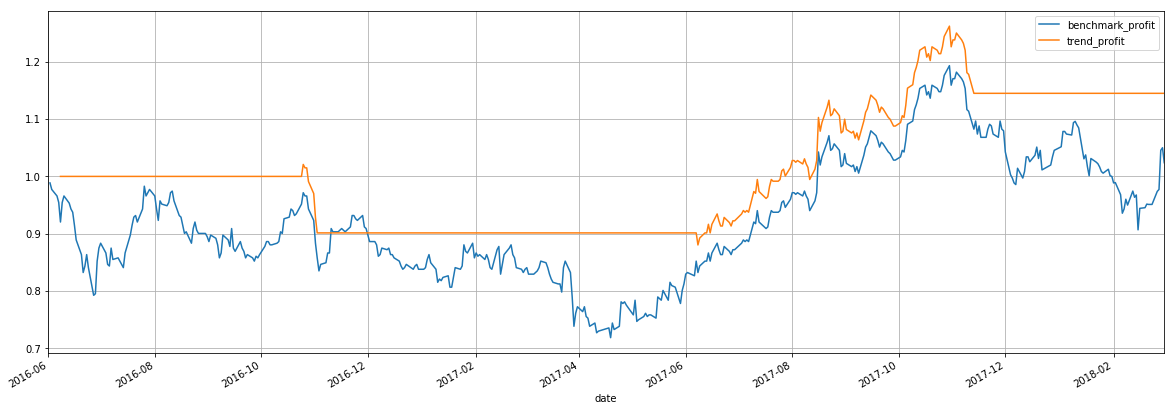

In [33]:
test['keep'] = test['signal'].shift(1)
test['keep'].fillna(method='ffill', inplace=True)
test['benchmark_profit'] = np.log(test['close']/test['close'].shift(1))
test['trend_profit'] = test['keep'] * test['benchmark_profit']
test[['benchmark_profit', 'trend_profit']].cumsum().apply(np.exp).plot(grid=True, figsize=(20, 7))

In [35]:
#test.loc['2016-10-15':'2016-11-15']